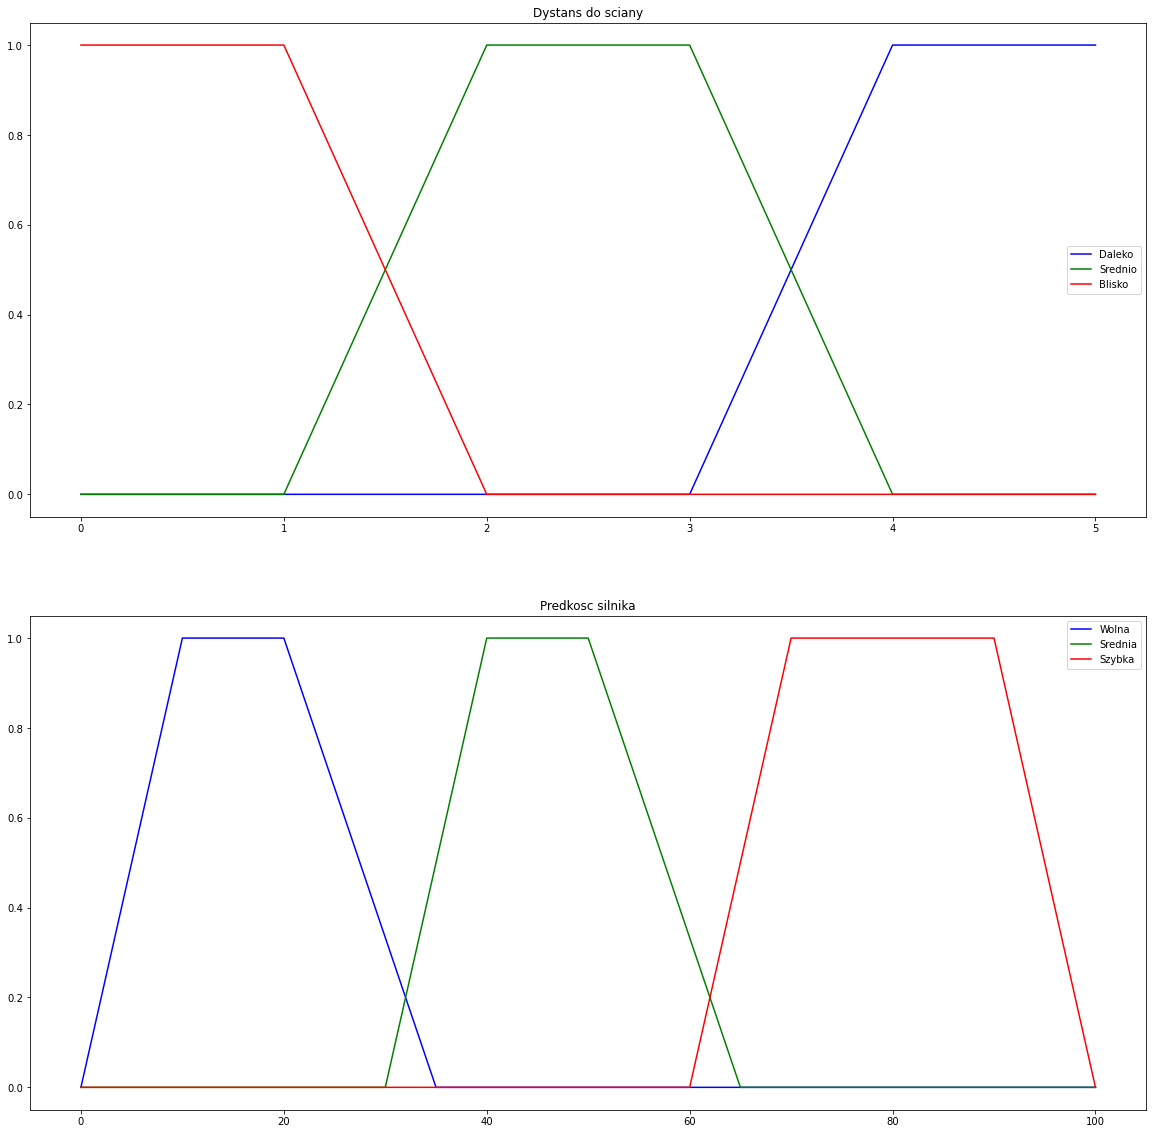

In [19]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

odleglosc= np.arange(0,6) #odleglosc do sciany 5m (0-5 predzial)
predkosc = np.arange(0, 101) #predkosc silnika od 0 do 100 


#reguly odleglosci
blisko = fuzz.trapmf(odleglosc, [0,0, 1,2])
srednio = fuzz.trapmf(odleglosc, [1.5, 2, 3.5,4])
daleko = fuzz.trapmf(odleglosc, [3, 4,5, 6])

#reguly predkosci
pr_wolna = fuzz.trapmf(predkosc, [0, 10,20, 35])
pr_srednia = fuzz.trapmf(predkosc, [30, 40,50, 65])
pr_szybka = fuzz.trapmf(predkosc, [60,70, 90, 100])

#wizualizacja regul
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20,20))
ax0.plot(odleglosc, daleko, 'b', linewidth=1.5, label='Daleko')
ax0.plot(odleglosc, srednio, 'g', linewidth=1.5, label='Srednio')
ax0.plot(odleglosc, blisko, 'r', linewidth=1.5, label='Blisko')
ax0.set_title("Dystans do sciany")
ax0.legend()

ax1.plot(predkosc, pr_wolna, 'b', linewidth=1.5, label='Wolna')
ax1.plot(predkosc, pr_srednia, 'g', linewidth=1.5, label='Srednia')
ax1.plot(predkosc, pr_szybka, 'r', linewidth=1.5, label='Szybka')
ax1.set_title("Predkosc silnika")
ax1.legend()

0


Text(0.5, 0, 'Dystans')

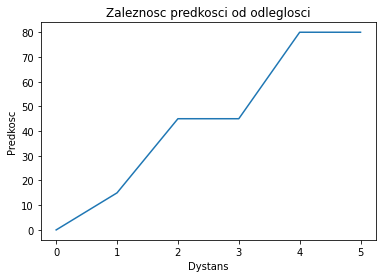

In [31]:

y_pr=[]

#stosowanie regul
#if daleko to szybka
#if srednio to srednia
#if blisko to wolna
for x in odleglosc:
    odl_blisko = fuzz.interp_membership(odleglosc, blisko,x)
    odl_srednio = fuzz.interp_membership(odleglosc, srednio,x)
    odl_daleko = fuzz.interp_membership(odleglosc, daleko,x)
    
    rule_daleko = np.fmin(odl_daleko, pr_szybka)
    rule_srednio = np.fmin(odl_srednio, pr_srednia)
    rule_blisko = np.fmin(odl_blisko, pr_wolna)
    
    
    aggregated = np.fmax(rule_daleko,np.fmax(rule_srednio,rule_blisko))
    y=fuzz.defuzz(predkosc,aggregated,"mom")
    y_pr.append(y)
y_pr[0] = 0


print(y_pr[0])
plt.plot(odleglosc, y_pr)
plt.title("Zaleznosc predkosci od odleglosci")
plt.ylabel("Predkosc")
plt.xlabel("Dystans")